# Assignment 1
## Setup

In [52]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from types import SimpleNamespace
from consav.linear_interp import interp_2d

# load local model file and initialize model class
from DynLaborFertModel import DynLaborFertModelClass

# Load local tools file
from tools import marshall_long, marshall_short

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#Settings
id = 53 #Main model id
dtau = 0.1 #Relative change in tax rate
load = False #Whether to load previous model solutions

In [ ]:
#Initialize model bank
#modelbank = {}

## Question 1

In [3]:
for id in range(53,54):
    modelbank[id] = {}
    b1 = id / 1000
    modelbank[id]['baseline'] = model = DynLaborFertModelClass(name='Q1',par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': b1})
    model.solve()
    model.simulate()
    
    #Response of h to a birth for different values of beta_1
    response = np.mean(model.sim.h[model.sim.time_since_birth==0])/np.mean(model.sim.h[model.sim.time_since_birth==-1]) -1
    print(f'beta_1 = {model.par.beta_1:.3f}', f'avg_response = {response:.2%}')

/Users/ahj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


beta_1 = 0.053 avg_response = -9.99%


/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/HH/HouseholdBehaviorCourse/Assignments/01/assignment1/DynLaborFertModel.py:432: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ahj/Library/CloudStorage/OneDrive-Personal/Polit/10. semester/HH/HouseholdBehaviorCourse/Assignments/01/assignment1/DynLaborFertModel.py:438: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


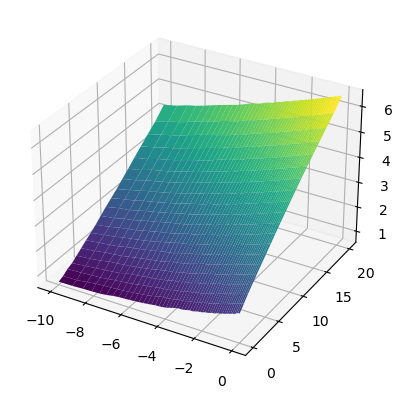

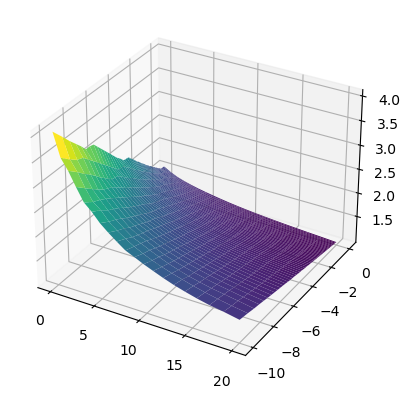

In [4]:
model.plot_policy(8)

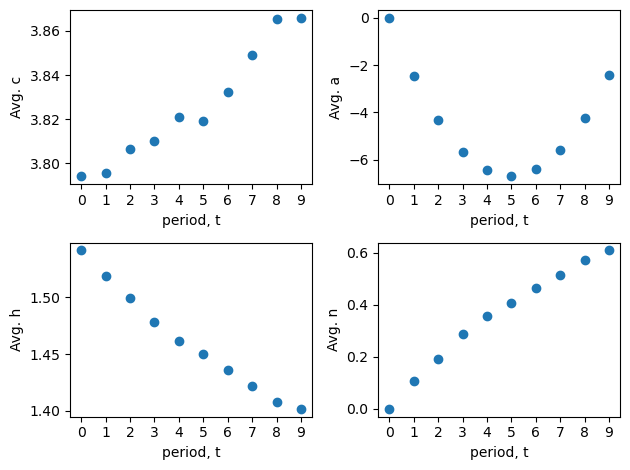

In [5]:
model.plot_behavior()

In [6]:
model.save()

## Question 2

In [7]:
if load:
    modelbank[id]['tax_increase'] = model = DynLaborFertModelClass(name='Q2', load=True)

else:
    modelbank[id]['tax_increase'] = model = DynLaborFertModelClass(name='Q2',par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
    model.solve()
    model.simulate()
    model.save()  

In [9]:
np.min(model.sim.a)

-6.681539057592652

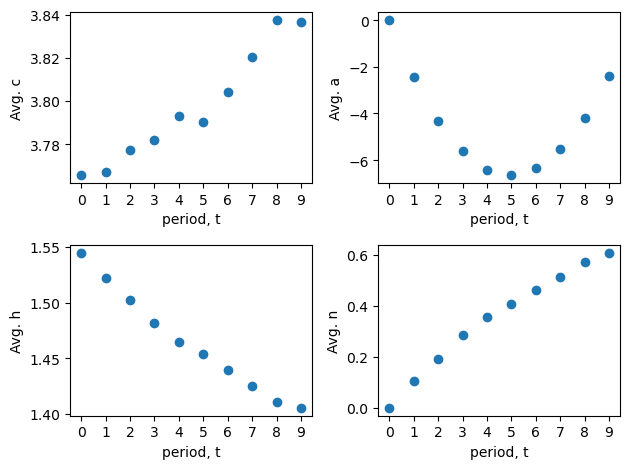

In [10]:
model.plot_behavior()

/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:80: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


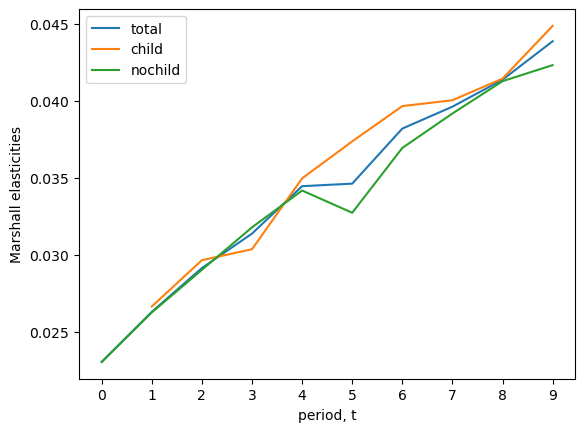

In [11]:
marshall_short(modelbank, id, dtau=dtau)

/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:28: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


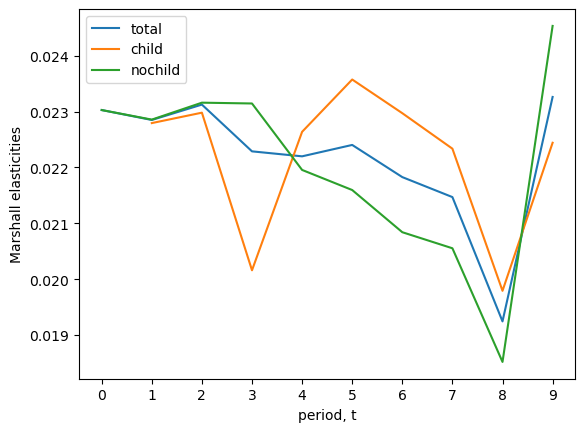

In [12]:
marshall_long(modelbank, id, dtau=dtau)

# Question 3

In [13]:
modelbank[153] = {}
if load:
    modelbank[153]['baseline'] = model = DynLaborFertModelClass(name='Q3b', load=True)
else:
    modelbank[153]['baseline'] = model = DynLaborFertModelClass(name='Q3b', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01})
    model.solve()
    model.simulate()
    model.save()

if load:
    modelbank[153]['tax_increase'] = model = DynLaborFertModelClass(name='Q3s', load=True)
else:
    modelbank[153]['tax_increase'] = model = DynLaborFertModelClass(name='Q3s',par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
    model.solve()
    model.simulate()
    model.save()

In [14]:
#print( modelbank[153]['tax_increase'].sol.h / modelbank[153]['baseline'].sol.h)
#print(modelbank[153]['tax_increase'].sim.h.mean(axis=0))
print(np.mean(modelbank[153]['baseline'].par.tau))
print(np.nanmean(modelbank[153]['tax_increase'].par.tau))

0.1
0.11000000000000001


/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:80: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


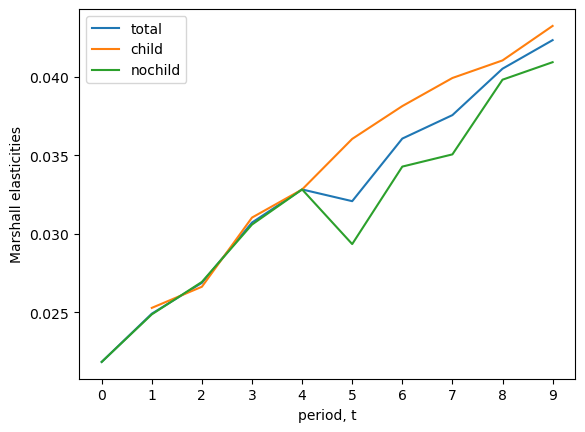

In [15]:
marshall_short(modelbank, 153, dtau=dtau)

/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:28: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


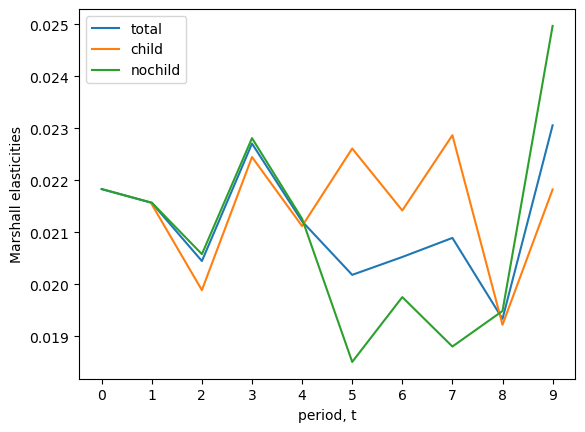

In [16]:
marshall_long(modelbank, 153, dtau=dtau)

# Question 4

In [17]:
modelbank[5153] = {}
if load:
    modelbank[5153]['baseline'] = model = DynLaborFertModelClass(name='Q4b', load=True)
else:
    modelbank[5153]['baseline'] = model = DynLaborFertModelClass(name='Q4b', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05})
    model.solve()
    model.simulate()
    model.save()

if load:
    modelbank[5153]['tax_increase'] = model = DynLaborFertModelClass(name='Q4s', load=True)
else:
    modelbank[5153]['tax_increase'] = model = DynLaborFertModelClass(name='Q4s', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
    model.solve()
    model.simulate()
    model.save()

/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:80: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


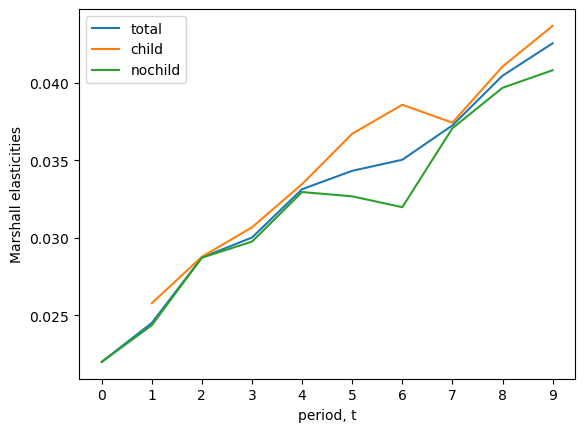

In [18]:
marshall_short(modelbank, 5153, dtau=dtau)

/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:28: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/1811044164.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


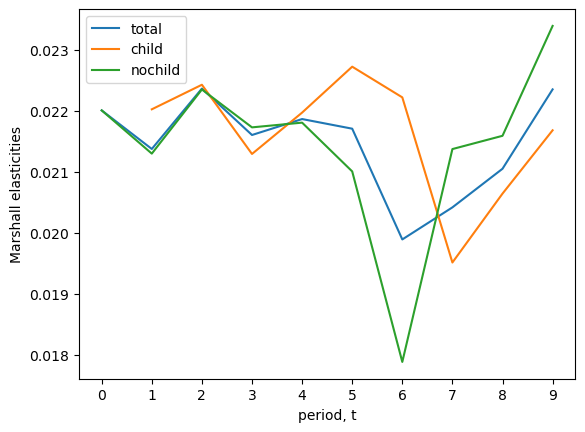

In [19]:
marshall_long(modelbank, 5153, dtau=dtau)

# Question 5

# Question 6

In [44]:
modelbank[85153] = {}
if load:
    modelbank[85153]['baseline'] = model = DynLaborFertModelClass(name='Q6b', load=True)
else:
    modelbank[85153]['baseline'] = model = DynLaborFertModelClass(name='Q6b', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05, 'p_spouse': 0.8})
    model.solve()
    model.simulate()
    model.save()

# if load:
#     modelbank[85153]['tax_increase'] = model = DynLaborFertModelClass(name='Q6s', load=True)
# else:
#     modelbank[85153]['tax_increase'] = model = DynLaborFertModelClass(name='q6s', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05, 'p_spouse': 0.8, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
#     model.solve()
#     model.simulate()
#     model.save()

/Users/ahj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/2455528618.py:21: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/2455528618.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


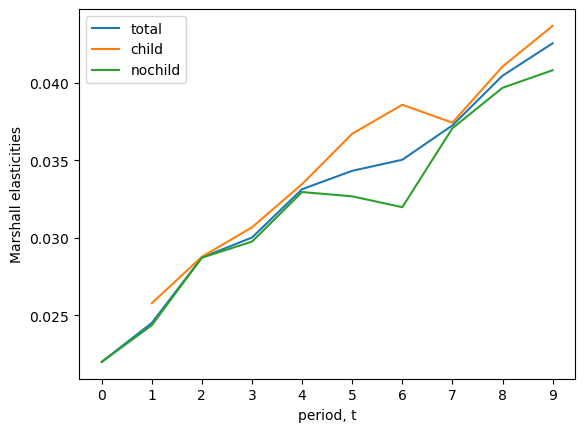

In [50]:
marshall_short(modelbank, 85153, dtau=dtau)

/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/2455528618.py:21: RuntimeWarning: Mean of empty slice
  marshall_child[t]   = np.nanmean((shock_h[with_child,t]    - base_h[with_child,t])    / base_h[with_child,t])
/var/folders/1r/8nkpk12x70q1298b8pv7ghp40000gn/T/ipykernel_79534/2455528618.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


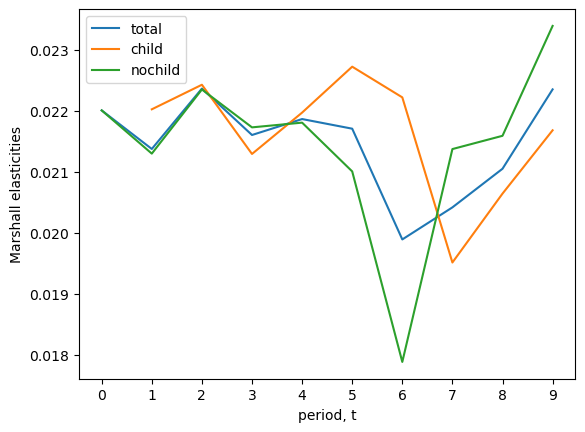

In [51]:
marshall_long(modelbank, 85153, dtau=dtau)

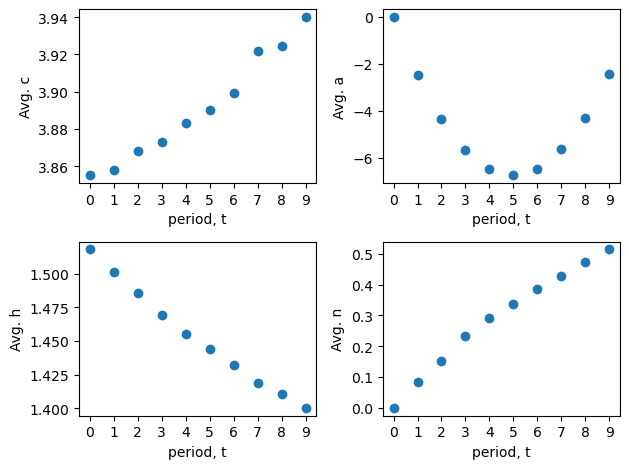

In [45]:
model.plot_behavior()

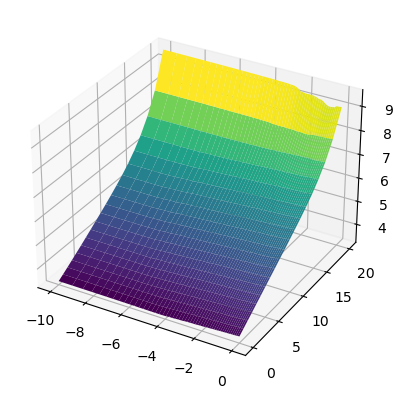

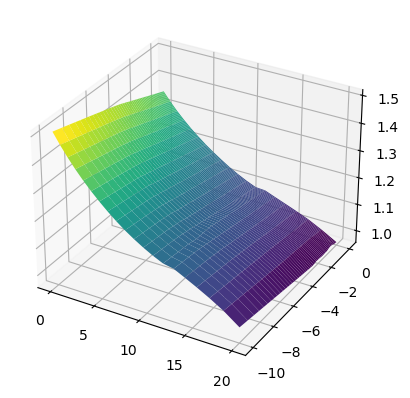

In [42]:
modelbank[5153]['baseline'].plot_policy(0)


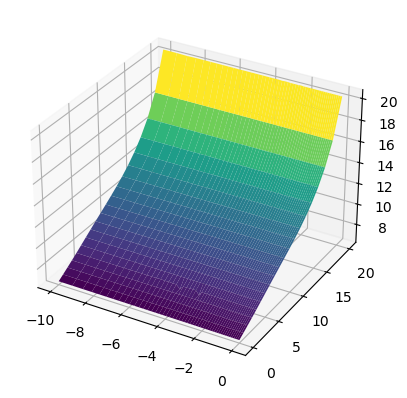

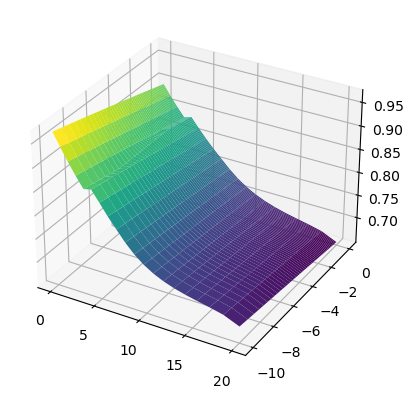

In [39]:
modelbank[85153]['baseline'].plot_policy(0)

In [35]:
def plot_compare_behavior(modelbank, id_list, names):
    '''Plot the policy functions for a list of models'''
    
    #a. Setup figure
    ax = {}
    fig, ((ax['c'],ax['a']),(ax['h'],ax['n']))  = plt.subplots(2,2)
    fig.tight_layout()
    
    #b. Loop over models
    for id in id_list:
        #i. Unpack
        par = modelbank[id]['baseline'].par
        sim = modelbank[id]['baseline'].sim
        
        #ii. Loop over behavior
        for var in ('c','a','h','n'):
            ax[var].scatter(range(par.simT),np.mean(getattr(sim,var),axis=0))
            ax[var].set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT))
            
    #Add legend
    fig.legend(names)

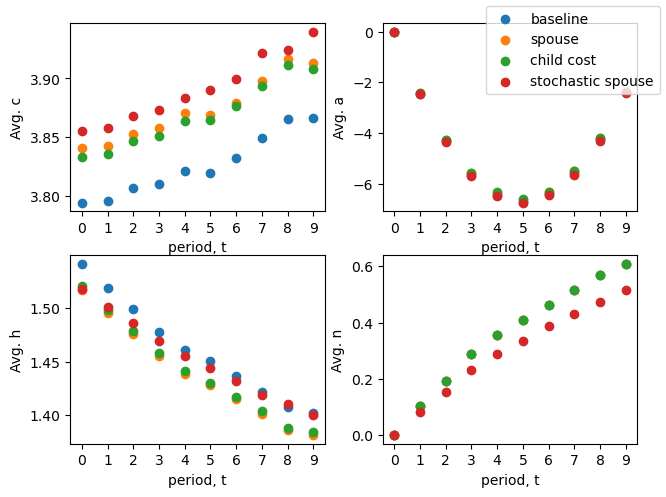

In [46]:
plot_compare_behavior(modelbank,[53,153,5153,85153],['baseline','spouse','child cost','stochastic spouse'])

In [61]:
def plot_compare_marshall(modelbank, id_list, names, dtau):
    '''Plot the policy functions for a list of models'''
    
    #a. Setup figure
    ax = {}
    fig, ax = plt.subplots(1,1)
    fig.tight_layout()
    
    #b. Loop over models
    for id in id_list:
        #i. Unpack
        par = modelbank[id]['baseline'].par
        sim = modelbank[id]['baseline'].sim
        
        #ii. Get Marshall elasticities
        marshall_total, _, _ = marshall_long(modelbank, id, dtau=dtau, print_figure=False, output=True)
        
        ax.scatter(range(par.simT),marshall_total)
            
    #Add legend
    fig.legend(names)

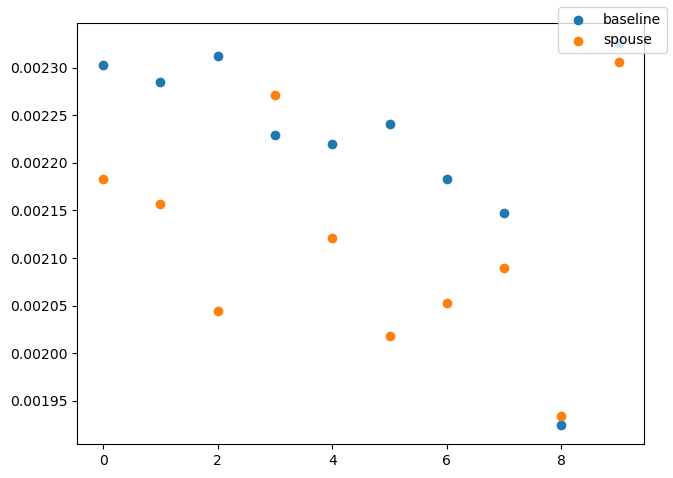

In [62]:
plot_compare_marshall(modelbank,[53,153],['baseline','spouse'],dtau)